# What's Cooking


### TABLE OF CONTENTS

* Introduction
* Data Exploration
* Cuisine Classification
* Conclusion

### Introduction

What comes to mind when you think of Indian food? Spices? What comes to mind when you think of Italian food? Cheese? Pasta? Every cuisine is different. Food is an important part of our culture and is linked to who we are and where we come from. Food styles can tell a lot about traditions and often represent tastes, hospitality, availability of ingredients, and even religion.

The goal of this project is to identify cuisine types based on a list of ingredients. Indian cuisines may use more spices while Italian food may use more cheese and hence, there is an inherent difference between the ingredients used by these cuisines. Using machine learning, we will try to learn these patterns in the ingredient usage for different cuisines. The overarching goal of the project is to identify differences and similarities between the ingredients used in different cuisines.

Our Dataset has  the rich variety of cuisines and ingredients. Let's have a look at the data.

### Data Exploration

In [2]:
# Import libraries
import numpy as np
import pandas as pd

%matplotlib inline
import matplotlib.pyplot as plt

import matplotlib.pylab as plt
from collections import Counter
import matplotlib as mpl
from sklearn import preprocessing
from sklearn.metrics import accuracy_score

In [3]:
# Load the data
df_train = pd.read_json('./train.json')
df_train.head()

id      cuisine                                        ingredients
0  10259        greek  [romaine lettuce, black olives, grape tomatoes...
1  25693  southern_us  [plain flour, ground pepper, salt, tomatoes, g...
2  20130     filipino  [eggs, pepper, salt, mayonaise, cooking oil, g...
3  22213       indian                [water, vegetable oil, wheat, salt]
4  13162       indian  [black pepper, shallots, cornflour, cayenne pe...

It seems each cuisine has different types of ingredients.

Let's find out the top cuisines: Here, I am going to use value_counts to find the top cuisines. Value_counts help us to find how many and how much of these cuisines do we have.

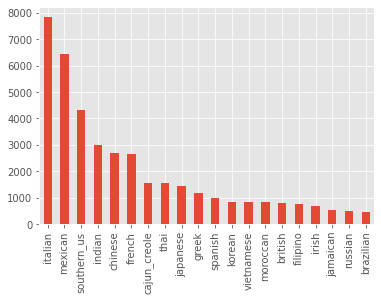

In [4]:
plt.style.use('ggplot')
df_train['cuisine'].value_counts().plot(kind='bar');

From the graph, we see that Italian is the top most cuisine, next comes Mexican, Southern US, a little less of the other recipes.

To get a little insight into the data, we can look at a couple of recipes. In particular, we can count the most frequent ingredients for each cuisine. To do that, I am going to use Python counter objects.

In [6]:
from collections import Counter
counters = {}
for cuisine in df_train['cuisine'].unique():
    counters[cuisine] = Counter()
    indices = (df_train['cuisine'] == cuisine)
    for ingredients in df_train[indices]['ingredients']:
        counters[cuisine].update(ingredients)

In [7]:
counters['italian'].most_common(10)

[('salt', 3454),
 ('olive oil', 3111),
 ('garlic cloves', 1619),
 ('grated parmesan cheese', 1580),
 ('garlic', 1471),
 ('ground black pepper', 1444),
 ('extra-virgin olive oil', 1362),
 ('onions', 1240),
 ('water', 1052),
 ('butter', 1030)]

Since Italian is the top most cuisine, I have taken italian and found the most common ingredients in that particular cuisine. From the result, salt, olive oil, garlic cloves, grated parmesan cheese, garlic, ground black pepper, extra-virgin olive oil, onions, water and butter are the most common ingredients that have been used in Italian cuisine.

Let's look at the most common ingredients for every cuisine:

In [8]:
top10 = pd.DataFrame([[items[0] for items in counters[cuisine].most_common(10)] for cuisine in counters],
            index=[cuisine for cuisine in counters],
            columns=['top{}'.format(i) for i in range(1, 11)])
top10

top1               top2               top3  \
greek               salt          olive oil      dried oregano   
southern_us         salt             butter  all-purpose flour   
filipino            salt             garlic              water   
indian              salt             onions       garam masala   
jamaican            salt             onions              water   
spanish             salt          olive oil      garlic cloves   
italian             salt          olive oil      garlic cloves   
mexican             salt             onions       ground cumin   
chinese        soy sauce         sesame oil               salt   
british             salt  all-purpose flour             butter   
thai          fish sauce             garlic               salt   
vietnamese    fish sauce              sugar               salt   
cajun_creole        salt             onions             garlic   
brazilian           salt             onions          olive oil   
french              salt              sugar  all-purpose flour   
japanese       soy sauce               salt              mirin   
irish               salt  all-purpose flour             butter   
korean         soy sauce         sesame oil             garlic   
moroccan            salt          olive oil       ground cumin   
russian             salt              sugar             onions   

                                top4                  top5  \
greek                  garlic cloves  feta cheese crumbles   
southern_us                    sugar            large eggs   
filipino                      onions             soy sauce   
indian                         water       ground turmeric   
jamaican                      garlic       ground allspice   
spanish       extra-virgin olive oil                onions   
italian       grated parmesan cheese                garlic   
mexican                       garlic             olive oil   
chinese                  corn starch                 sugar   
british                         milk                  eggs   
thai                    coconut milk         vegetable oil   
vietnamese                    garlic                 water   
cajun_creole       green bell pepper                butter   
brazilian                       lime                 water   
french               unsalted butter             olive oil   
japanese                       sugar                 water   
irish                         onions                 sugar   
korean                  green onions                 sugar   
moroccan                      onions       ground cinnamon   
russian            all-purpose flour            sour cream   

                                top6                    top7  \
greek         extra-virgin olive oil       fresh lemon juice   
southern_us            baking powder                   water   
filipino                      pepper                     oil   
indian                        garlic              cumin seed   
jamaican                      pepper               scallions   
spanish                        water                tomatoes   
italian          ground black pepper  extra-virgin olive oil   
mexican                 chili powder        jalapeno chilies   
chinese                       garlic                   water   
british              unsalted butter                   sugar   
thai                       soy sauce                   sugar   
vietnamese                   carrots               soy sauce   
cajun_creole               olive oil          cayenne pepper   
brazilian              garlic cloves                  garlic   
french                        butter                   water   
japanese                        sake            rice vinegar   
irish                       potatoes             baking soda   
korean                          salt                   water   
moroccan               garlic cloves                   water   
russian                         eggs              

These are the most common ingredients used in different cuisines.

Let’s see which ingredients among the top 10 ingredients are highly specific for a certain cuisine: A way to do this is to simply count the number of times an ingredient appears in a given cuisine and divide by the total number of recipes. To do this, I first created a new column(every_ingredients) in our dataframe by simply concatenating the ingredients to a single string.

In [9]:
df_train['every_ingredients'] = df_train['ingredients'].map(";".join)
df_train.head()

id      cuisine                                        ingredients  \
0  10259        greek  [romaine lettuce, black olives, grape tomatoes...   
1  25693  southern_us  [plain flour, ground pepper, salt, tomatoes, g...   
2  20130     filipino  [eggs, pepper, salt, mayonaise, cooking oil, g...   
3  22213       indian                [water, vegetable oil, wheat, salt]   
4  13162       indian  [black pepper, shallots, cornflour, cayenne pe...   

                                   every_ingredients  
0  romaine lettuce;black olives;grape tomatoes;ga...  
1  plain flour;ground pepper;salt;tomatoes;ground...  
2  eggs;pepper;salt;mayonaise;cooking oil;green c...  
3                     water;vegetable oil;wheat;salt  
4  black pepper;shallots;cornflour;cayenne pepper...

We can now check for the presence of an ingredient in a recipe: Let’s take a wheat for example. This can be used to group our recipes by the presence of that ingredient.

In [12]:
df_train['every_ingredients'].str.contains('wheat')

0        False
1        False
2        False
3         True
4        False
         ...  
39769     True
39770    False
39771    False
39772    False
39773    False
Name: every_ingredients, Length: 39774, dtype: bool

The result shows the presence of the ingredient "wheat". This can be used to analyse and group the recipes by the presence of that particular ingredient.

Let's plot a graph for a ingredient "wheat" as per cuisine.

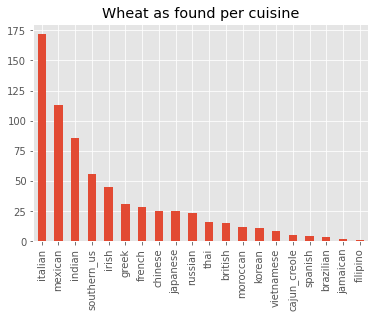

In [17]:
indices = df_train['every_ingredients'].str.contains('wheat')
df_train[indices]['cuisine'].value_counts().plot(kind='bar',
                                                 title='Wheat as found per cuisine');

From the result, wheat is being used mostly in Italian, Mexican, Southern_US cuisines.

We can do this sort of plot for all the ingredients. First let's determine the unique ingredients:

In [15]:
import numpy as np
unique = np.unique(top10.values.ravel())
unique

array(['all-purpose flour', 'avocado', 'baking powder', 'baking soda',
       'black pepper', 'butter', 'buttermilk', 'cachaca',
       'cajun seasoning', 'carrots', 'cayenne pepper', 'chili powder',
       'coconut milk', 'corn starch', 'corn tortillas', 'cumin seed',
       'dried oregano', 'dried thyme', 'eggs', 'extra-virgin olive oil',
       'feta cheese crumbles', 'fish sauce', 'fresh lemon juice',
       'fresh lime juice', 'garam masala', 'garlic', 'garlic cloves',
       'ginger', 'grated parmesan cheese', 'green bell pepper',
       'green onions', 'ground allspice', 'ground black pepper',
       'ground cinnamon', 'ground cumin', 'ground ginger',
       'ground turmeric', 'jalapeno chilies', 'large eggs', 'lime',
       'milk', 'mirin', 'oil', 'olive oil', 'onions', 'paprika', 'pepper',
       'potatoes', 'red bell pepper', 'rice vinegar', 'sake', 'salt',
       'scallions', 'sesame oil', 'sesame seeds', 'shallots',
       'sour cream', 'soy sauce', 'sugar', 'tomatoes', 'un

Let's plot for all the ingredients as per the cuisine:

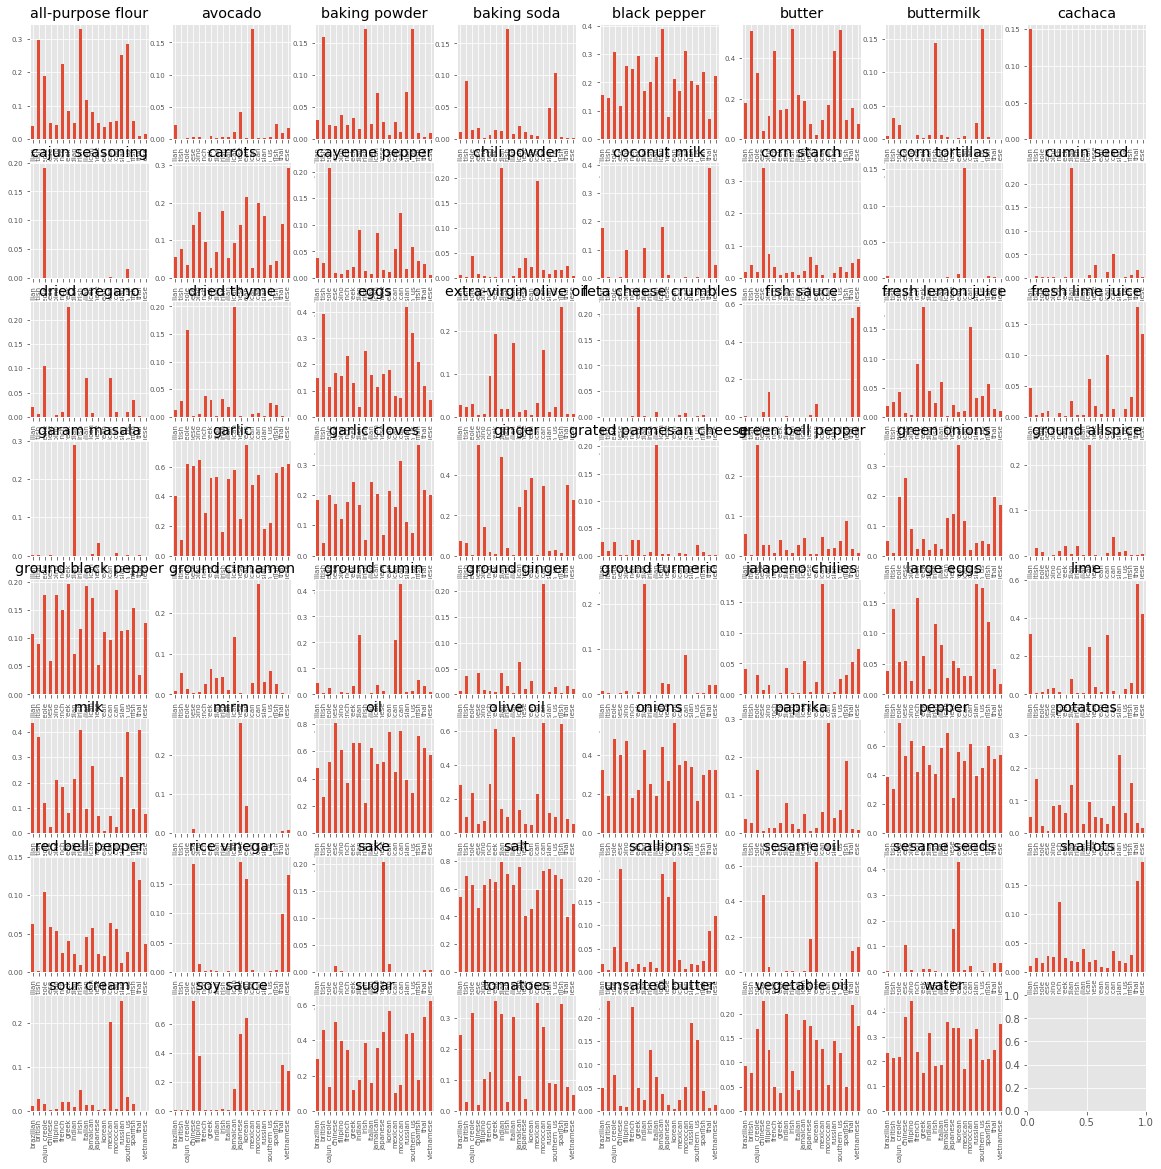

In [19]:
fig, axes = plt.subplots(8, 8, figsize=(20, 20))
for ingredient, ax_index in zip(unique, range(64)):
    indices = df_train['every_ingredients'].str.contains(ingredient)
    relative_freq = (df_train[indices]['cuisine'].value_counts() / df_train['cuisine'].value_counts())
    relative_freq.plot(kind='bar', ax=axes.ravel()[ax_index], fontsize=7, title=ingredient)

The figure represent the ingredients which have a high amount of uniqueness. Those are listed below:

1. soy sauce (asian cuisine)
2. sake (Japanese)
3. sesame oil (asian cuisine)
4. feta cheese crumbs (Greek)
5. garam masala (Indian)
6. ground ginger (Moroccan)
7. avocado (Mexican)

### DATA CLEANING & FEATURE ENGINEERING

In [25]:
df = pd.read_json('./train.json')
df.head()

# Create empty list to store recipe features
features_all_list = []

# Extract the features from each recipe (need a global list)
for i in df.ingredients:
    features_all_list += i

# Remove duplicate features using default set behavior
features = list( set(features_all_list) )

len(features)

6714

Given the structure of the data, however, this is difficult because not each recipe has each ingredient.

In [26]:
# Create a zeros-only matrix with a row for each recipe and column for each feature
onehot_ingredients = np.zeros((df.shape[0], len(features)))

# Index the features (ingredients) alphabetically
feature_lookup = sorted(features)

# For each recipe look up ingredient position in the sorted ingredient list
# If that ingredient exists, set the appropriate column equal to 1
for index, row in df.iterrows():
    for ingredient in row['ingredients']:
        onehot_ingredients[index, feature_lookup.index(ingredient)] = 1

        
y = df.cuisine.values.reshape(-1,1)

Using the indices of the ingredients, we can reduce the amount of string matching required to one-hot encode the ingredients into binary features.

In [27]:
# Create a dataframe
df_features = pd.DataFrame(onehot_ingredients)

# Create empty dictionary to store featureindex:columnname
d = {}

# For each feature, fetch the column name
for i in range(len(features)):
    d[df_features.columns[i]] = features[i]

# Rename the features (stop using the index # and use the actual text)
df_features = df_features.rename(columns=d)
df_features.shape

(39774, 6714)

In [28]:
df_features.head()

carbonated beverages  dough  dried sardines  dark corn syrup  \
0                   0.0    0.0             0.0              0.0   
1                   0.0    0.0             0.0              0.0   
2                   0.0    0.0             0.0              0.0   
3                   0.0    0.0             0.0              0.0   
4                   0.0    0.0             0.0              0.0   

   stewing steak  instant oats  brioche buns  mild curry powder  \
0            0.0           0.0           0.0                0.0   
1            0.0           0.0           0.0                0.0   
2            0.0           0.0           0.0                0.0   
3            0.0           0.0           0.0                0.0   
4            0.0           0.0           0.0                0.0   

   flat leaf spinach  plum tomatoes  ...  sliced tomatoes  \
0                0.0            0.0  ...              0.0   
1                0.0            0.0  ...              0.0   
2                0.0            0.0  ...              0.0   
3                0.0            0.0  ...              0.0   
4                0.0            0.0  ...              0.0   

   greek-style vinaigrette  japanese breadcrumbs  sweet potato starch  \
0                      0.0                   0.0                  0.0   
1                      0.0                   0.0                  0.0   
2                      0.0                   0.0                  0.0   
3                      0.0                   0.0                  0.0   
4                      0.0                   0.0                  0.0   

   Thai chili garlic sauce  preserved lemon  dark sesame oil  \
0                      0.0              0.0              0.0   
1                      0.0              0.0              0.0   
2                      0.0              0.0              0.0   
3                      0.0              0.0              0.0   
4                      0.0              0.0              0.0   

   colby jack cheese  aÃ§ai  white italian tuna in olive oil  
0                0.0    0.0                              0.0  
1                0.0    0.0                              0.0  
2                0.0    0.0                              0.0  
3                0.0    0.0                              0.0  
4                0.0    0.0                              0.0  

[5 rows x 6714 columns]

### CUISINE CLASSIFICATION

* DECISION TREE

* RANDOM FOREST

* MULTINOMIAL LOGISTIC REGRESSION

In order to classify with best practices in mind, we need to ensure that we split the data into train and test sets. This step will help prevent overfitting. Completing this step prior to training all of the models allows us to use the same train and test data across models. Note that we are using the shuffle feature to rearrange the recipes (in case the order was not originally random) and test_size=0.2 indicating that we want 80% of the data reserved for training and 20% for testing.m

In [29]:
# Import train_test_split
from sklearn.model_selection import train_test_split

# Split into train, test
X_train, X_test, y_train, y_test = train_test_split(df_features, y, test_size=0.2, shuffle=True, random_state=42)

### DECISION TREE

The first model that we fit is a basic, unpruned decision tree. We use this model as a baseline for performance in the classification task.

In [30]:
# Import decision tree from sklearn
from sklearn.tree import DecisionTreeClassifier

# Set up the decision tree
clf = DecisionTreeClassifier(max_features=5000)

# Fit the decision tree to the training data
clf.fit(X_train, y_train)

# Use the decision tree to predict values for the test data
y_pred = clf.predict(X_test)

# Calculate the accuracy score and print the results
a = accuracy_score(y_test, y_pred)
print("Accuracy Score in % : ")
print(a * 100)

Accuracy Score in % : 
60.17598994343181


For this first decision tree, the potentially unbiased test error is estimated to be 60.18%. For context, a human typically can classify recipes into the correct cuisine in 45-50% of attempts. The max-depth of this decision tree was 403 splits which could indicate overfitting. Ideally, we would tune the max-depth hyperparameter but since we only need a baseline, this number will suffice.

### RANDOM FOREST

The second model chosen is an ensemble method known as ‘random forest’. You can read more about it on Wikipedia. While the decision tree serves only as a baseline classifier, with the Random Forest we want to tune the model’s hyper-parameters. For example, we tuned each of the following independently and then also used them as a basis for tuning a combination: maximum tree depth, number of trees in the forest, maximum number of features considered at each split, and minimum number of samples per split.

In [31]:
# Import random forest classifier from sklearn
from sklearn.ensemble import RandomForestClassifier

# Set up random forest classifier
clf = RandomForestClassifier()

# Train the random forest (use ravel to coerce to 1d array)
clf.fit(X_train, y_train.ravel())

# Get test predictions
y_pred = clf.predict(X_test)

# Get accuracy for the random forest classifier
a = accuracy_score(y_test, y_pred)
print("Accuracy Score in % : ")
print(a * 100)

C:\Users\Lilit\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


Accuracy Score in % : 
67.32872407291012


By tuning the random forest, we were able to increase test accuracy from 67.33% to 71.65% by setting max_depth=200, n_estimators=250, max_features=‘sqrt’, and min_samples_split=7.

In [32]:
# Setting up the tuned random forest
clf = RandomForestClassifier(max_depth=200, n_estimators=250, max_features='sqrt', min_samples_split=7)

# Train the random forest (use ravel to coerce to 1d array)
clf.fit(X_train, y_train.ravel())

# Get test predictions
y_pred = clf.predict(X_test)

# Get accuracy for the random forest classifier
a = accuracy_score(y_test, y_pred)
print("Accuracy Score in % : ")
print(a * 100)

Accuracy Score in % : 
71.65304839723444


After training the random forest model, we can extract information about the relative importance of each feature (ingredient) in determining the class (cuisine) of a given recipe. The variable importance plot below shows how acai juice and nori furikake are considered distinguishing ingredients.

### MULTINOMIAL LOGISTIC REGRESSION

To compete with the random forest, we trained a multinomial logistic regression.

In [33]:
# import logistic regresion
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

# Set up and fit logistic regression
clf = LogisticRegression(random_state=0, solver='lbfgs',multi_class='multinomial').fit(X_train, y_train.ravel())

# Get predictions on test data
y_pred = clf.predict(X_test)

# Get accuracy
a = accuracy_score(y_test, y_pred)
print("Accuracy Score in % : ")
print(a * 100)

C:\Users\Lilit\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)


Accuracy Score in % : 
78.13953488372093


We were surprised by the performance of the logistic regression because it scored 78.14% test accuracy (6.5% better than the random forest). We believe that the number of features and sparseness of data is problematic for the random forest algorithm.

### Conclusion

At this point, it is helpful to remind ourselves that we are trying to answer this question:

1) CAN MACHINE LEARNING BE USED TO DEMOSTRATE LEARNING AND SUCCESSFULLY CLASSIFY CUISINES BASED ON INGREDIENTS?


To answer this question, we can rely on the test accuracy increases that we generated by tuning models and comparing to human performance. Modern machine learning techniques can, in fact, help classify recipes into different cuisine groups. As trained data scientists we feel obligated to mention that accuracy is often an overused metric (because it does not factor in unequal costs of false positives and false negatives). In this case, however, we are indifferent to incorrect classifications of cuisines.

###### HL :)